# Adjacency Lists/Matrices
`Lessons[5]`  
*This document contains runnable python examples. You may edit and run code blocks by pressing `Shift-Enter`*

---

In our [lesson on graphs](https://www.stuyccc.com/lessons/graph-intro.html), we learned about how we can visualize graphs by eye. We can't exactly do the same thing when writing programs that interact with graphs. We have to create a *representation* of the graph in our programs so that our algorithm can process the graph. There are dozens of different ways to represent graphs, each having its use in certain problems.  
Today we'll be learning about **Adjacency Lists**, a simple way to represent graphs in memory. Most algorithms can effectively utilize adjacency lists. In a graph, each node would be assigned an adjacency list consisting of other nodes it shares an edge with. 
  
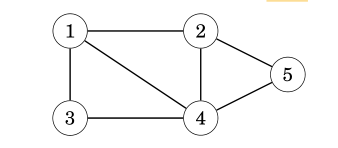
For example, to build the adjacency list for this graph

In [2]:
adjacency_list = {1: [2, 3, 4],
         2: [1, 4, 5],
         3: [1, 4],
         4: [1, 2, 3, 5],
         5: [2, 4]}
print(adjacency_list[1]) #Print all the nodes connected to Node 1

[2, 3, 4]


If one wanted to represent a weighted version of this graph, they would simply store the weights alongside the nodes.  
  
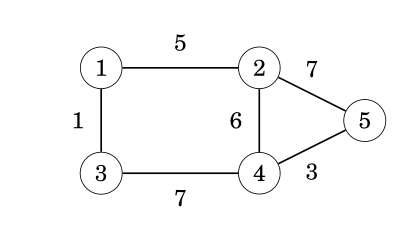    
and it's representation:

In [3]:
adjacency_list = {1: [(2,5), (3,1)],
         2: [(1,5), (4,6), (5,7)],
         3: [(1,1), (4,7)],
         4: [(2,6), (3,7), (5,3)],
         5: [(2,7), (4,3)]}
print(adjacency_list[1]) #Print all the nodes, and the edge weights, connected to Node 1

[(2, 5), (3, 1)]


### BFS Sample Problem
Problem 1: Piggy Back [Brian Dean, 2014]

Bessie and her sister Elsie graze in different fields during the day,
and in the evening they both want to walk back to the barn to rest.
Being clever bovines, they come up with a plan to minimize the total
amount of energy they both spend while walking.

Bessie spends B units of energy when walking from a field to an
adjacent field, and Elsie spends `E` units of energy when she walks to
an adjacent field.  However, if Bessie and Elsie are together in the
same field, Bessie can carry Elsie on her shoulders and both can move
to an adjacent field while spending only `P` units of energy (where P
might be considerably less than `B+E`, the amount Bessie and Elsie would
have spent individually walking to the adjacent field).  If `P` is very
small, the most energy-efficient solution may involve Bessie and Elsie
traveling to a common meeting field, then traveling together piggyback
for the rest of the journey to the barn.  Of course, if `P` is large, it
may still make the most sense for Bessie and Elsie to travel
separately.  On a side note, Bessie and Elsie are both unhappy with
the term "piggyback", as they don't see why the pigs on the farm
should deserve all the credit for this remarkable form of
transportation.

Given `B`, `E`, and `P`, as well as the layout of the farm, please compute
the minimum amount of energy required for Bessie and Elsie to reach
the barn.

INPUT: (file piggyback.in)

The first line of input contains the positive integers `B`, `E`, `P`, `N`, and
`M`.  All of these are at most `40,000`.  `B`, `E`, and `P` are described above.
`N` is the number of fields in the farm (numbered `1..N`, where `N >= 3`),
and `M` is the number of connections between fields.  Bessie and Elsie
start in fields `1` and `2`, respectively.  The barn resides in field `N`.

The next `M` lines in the input each describe a connection between a
pair of different fields, specified by the integer indices of the two
fields.  Connections are bi-directional.  It is always possible to
travel from field `1` to field `N`, and field `2` to field `N`, along a series
of such connections.  
  
### BFS Sample Problem 2  
The second problem is [Leetcode's Open the Lock problem](https://leetcode.com/problems/open-the-lock/).

Test Case:
```
SAMPLE INPUT:

4 4 5 8 8
1 4
2 3
3 4
4 7
2 5
5 6
6 8
7 8
```

OUTPUT: (file piggyback.out)

A single integer specifying the minimum amount of energy Bessie and
Elsie collectively need to spend to reach the barn.  In the example
shown here, Bessie travels from `1` to `4` and Elsie travels from `2` to `3`
to `4`.  Then, they travel together from `4` to `7` to `8`.

```
SAMPLE OUTPUT:

22
```



In [ ]:
#Solution to USACO problem -- This solution won't run on the website, since it requires file inputs.
from collections import deque
lines = [line.strip() for line in open("piggyback.in").readlines()],
b,e,p,n,m = eval(lines[0].replace(' ',',')),
adj={}
for m in lines[1:]:
    l,r=eval(m.replace(' ',','))
    adj[l]=adj.get(l,[])+[r]
    adj[r]=adj.get(r,[])+[l]

def bfs(source):
    vis={}
    dist={}
    q = deque([source])
    vis[source] = True
    dist[source] = 0
    while q:
        s = q.popleft()
        for u in adj[s]:
            if vis.get(u,False): continue
            dist[u] = 1+dist[s]
            vis[u] = True
            q.append(u)
    return dist

x_1 = bfs(1)
x_2 = bfs(2)
x_N = bfs(n)
ans=float("inf")
for i in range(1,n+1):
    ans=min(ans, x_1[i]*b + x_2[i]*e + x_N[i]*p)

f=open("piggyback.out","x")
f.write(str(ans)+'\n')
f.close()

In [ ]:
#The solution to the Leetcode problem
from collections import deque

class Solution:
    def openLock(self, deadends: List[str], target: str) -> int:
        
        goal = tuple(int(i) for i in target)
        deadends = {tuple(int(i) for i in deadend) for deadend in deadends}
        
        if (0, 0, 0, 0) in deadends:
            return -1
        
        visited = {(0, 0, 0, 0)}
        # current_state, number_move sto get here
        queue = deque([((0, 0, 0, 0), 0)])
        
        def neighbors(current):
            
            for wheel_number in range(4):
                for delta in [-1, 1]:
                    new = list(current)
                    new[wheel_number] = (new[wheel_number] + delta + 10) % 10
                    nei = tuple(new)
                    if nei not in deadends:
                        yield nei
                    
        while queue:
            node, no_moves = queue.popleft()
            if node == goal:
                return no_moves
            for nei in neighbors(node):
                if nei not in visited:
                    visited.add(nei)
                    queue.append((nei, no_moves + 1))
        return -1

That's all folks! As always, if you have any feedback feel free to contact one of the instructors, or email stuyccc@gmail.com